<a href="https://colab.research.google.com/github/Evans-Karani/iris-decision-tree/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Inspect shapes
print("Training images shape:", x_train.shape, "Training labels shape:", y_train.shape)
print("Test images shape:    ", x_test.shape,  "Test labels shape:   ", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training images shape: (60000, 28, 28) Training labels shape: (60000,)
Test images shape:     (10000, 28, 28) Test labels shape:    (10000,)


In [3]:
# Reshape images to include the channel dimension and normalize to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode the labels into categorical format
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat  = tf.keras.utils.to_categorical(y_test, 10)

# Verify the new shapes
print("x_train shape:", x_train.shape, "y_train_cat shape:", y_train_cat.shape)
print("x_test  shape:", x_test.shape,  "y_test_cat  shape:", y_test_cat.shape)


x_train shape: (60000, 28, 28, 1) y_train_cat shape: (60000, 10)
x_test  shape: (10000, 28, 28, 1) y_test_cat  shape: (10000, 10)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Display the model architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [6]:
history = model.fit(
    x_train, y_train_cat,
    epochs=5,           # start with 5 epochs
    batch_size=128,     # reasonable batch size
    validation_split=0.1  # hold out 10% for validation
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8492 - loss: 0.5313 - val_accuracy: 0.9787 - val_loss: 0.0723
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9779 - loss: 0.0718 - val_accuracy: 0.9832 - val_loss: 0.0587
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9858 - val_loss: 0.0530
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9890 - val_loss: 0.0395
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9873 - val_loss: 0.0393


In [7]:
# Evaluate on the unseen test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.9895 - loss: 0.0346

Test accuracy: 0.9895


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


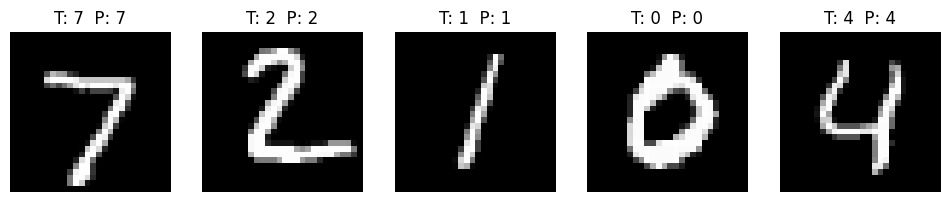

In [8]:
# Predict on the first 5 test images
preds = model.predict(x_test[:5])

# Plot the images with their true vs. predicted labels
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    # Show the image
    ax.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.axis("off")

    # Get true and predicted labels
    true_label = y_test[i]
    pred_label = np.argmax(preds[i])

    # Set title
    ax.set_title(f"T: {true_label}  P: {pred_label}")
plt.show()
